In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve


In [2]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
        https://stackoverflow.com/a/50386871
    """

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [30]:
from sklearn.tree._tree import TREE_LEAF
#https://stackoverflow.com/a/49496027

def prune_index(inner_tree, index, threshold):
    if inner_tree.value[index].min() < threshold:
        # turn node into a leaf by "unlinking" its children
        inner_tree.children_left[index] = TREE_LEAF
        inner_tree.children_right[index] = TREE_LEAF
    # if there are shildren, visit them as well
    if inner_tree.children_left[index] != TREE_LEAF:
        prune_index(inner_tree, inner_tree.children_left[index], threshold)
        prune_index(inner_tree, inner_tree.children_right[index], threshold)


In [3]:
full_set = pd.read_pickle("../../data/processed/full_set.pkl")

train_set = pd.read_pickle("../../data/processed/train_set.pkl")
test_set = pd.read_pickle("../../data/processed/test_set.pkl")

train_set_30 = pd.read_pickle("../../data/processed/train_set_30.pkl")
test_set_30 = pd.read_pickle("../../data/processed/test_set_30.pkl")

train_set_70 = pd.read_pickle("../../data/processed/train_set_70.pkl")
test_set_70 = pd.read_pickle("../../data/processed/test_set_70.pkl")

# Decision Tree classifiers

## Cross validation

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
cross_val_score(clf, full_set.iloc[:,0:2303], full_set['target'], cv=10)

## Train/test - default parameters

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(train_set.iloc[:,0:2303], train_set['target'])
y_pred = clf.predict(test_set.iloc[:, 0:2303])
conf_mat = confusion_matrix(test_set["target"], y_pred)
print(classification_report(test_set["target"], y_pred))
plot_confusion_matrix(conf_mat, target_names=test_set['target'].unique())


# y_pred_rf = clf.predict_proba(test_set.iloc[:, 0:2303])[:,1]
# fpr_rf, tpr_rf, _ = roc_curve(test_set['target'], y_pred_rf)

# plt.figure(2)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr_rf, tpr_rf, label='RF')
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.title('ROC curve')
# plt.legend(loc='best')
# plt.show()

## Train/test - Gini ration to Information Gain(entropy)

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       335
           1       0.80      0.83      0.81       350
           2       0.94      0.97      0.95       339
           3       0.95      0.91      0.93       332
           4       0.86      0.88      0.87       324
           5       0.87      0.89      0.88       308
           6       0.95      0.92      0.94       338
           7       0.96      0.98      0.97       316
           8       0.94      0.91      0.92       322
           9       0.96      0.98      0.97       336

    accuracy                           0.90      3300
   macro avg       0.90      0.90      0.90      3300
weighted avg       0.90      0.90      0.90      3300



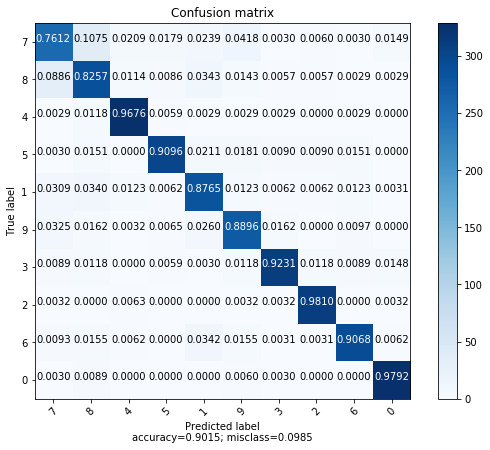

In [29]:
clf = DecisionTreeClassifier(criterion="entropy",random_state=42)
clf.fit(train_set.iloc[:,0:2303], train_set['target'])
y_pred = clf.predict(test_set.iloc[:, 0:2303])
conf_mat = confusion_matrix(test_set["target"], y_pred)
print(classification_report(test_set["target"], y_pred))
plot_confusion_matrix(conf_mat, target_names=test_set['target'].unique())


# Post-Pruning

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       335
           1       0.76      0.71      0.73       350
           2       0.91      0.96      0.94       339
           3       0.88      0.93      0.90       332
           4       0.89      0.84      0.86       324
           5       0.89      0.91      0.90       308
           6       0.93      0.90      0.91       338
           7       0.97      0.97      0.97       316
           8       0.90      0.88      0.89       322
           9       0.98      0.99      0.98       336

    accuracy                           0.89      3300
   macro avg       0.89      0.89      0.89      3300
weighted avg       0.89      0.89      0.89      3300



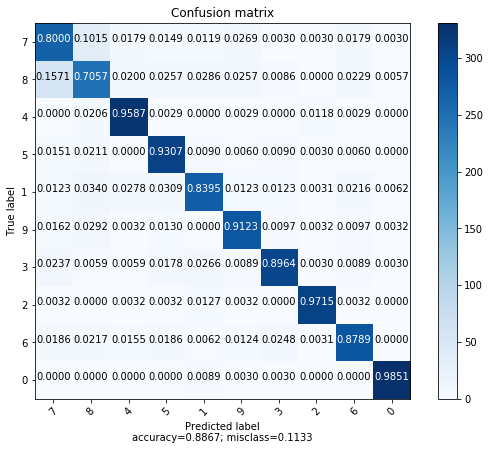

22 384
384


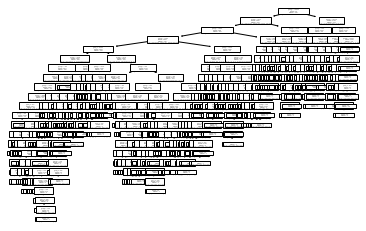

              precision    recall  f1-score   support

           0       0.36      0.76      0.49       335
           1       0.71      0.07      0.12       350
           2       0.66      0.70      0.68       339
           3       0.94      0.71      0.81       332
           4       0.45      0.79      0.58       324
           5       0.91      0.56      0.69       308
           6       0.94      0.81      0.87       338
           7       0.97      0.90      0.93       316
           8       0.73      0.73      0.73       322
           9       0.98      0.86      0.92       336

    accuracy                           0.69      3300
   macro avg       0.77      0.69      0.68      3300
weighted avg       0.76      0.69      0.68      3300



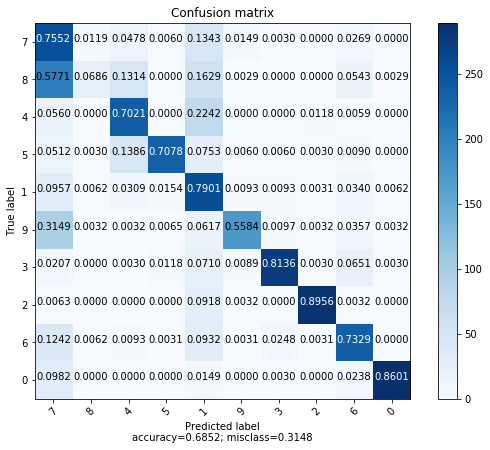

22 389
389


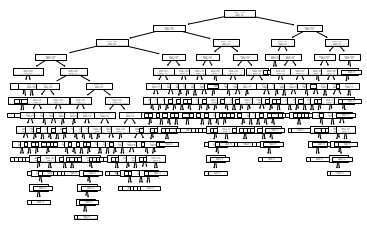

In [50]:
from sklearn.tree import plot_tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(train_set.iloc[:,0:2303], train_set['target'])
y_pred = clf.predict(test_set.iloc[:, 0:2303])
conf_mat = confusion_matrix(test_set["target"], y_pred)
print(classification_report(test_set["target"], y_pred))
plot_confusion_matrix(conf_mat, target_names=test_set['target'].unique())
print(clf.get_depth(), clf.get_n_leaves())

print(sum(clf.tree_.children_left < 0))
plt.figure(1)
plot_tree(clf)
plt.show()


prune_index(clf.tree_, 4, 5)
y_pred = clf.predict(test_set.iloc[:, 0:2303])
conf_mat = confusion_matrix(test_set["target"], y_pred)
print(classification_report(test_set["target"], y_pred))
plot_confusion_matrix(conf_mat, target_names=test_set['target'].unique())
print(clf.get_depth(), clf.get_n_leaves())

print(sum(clf.tree_.children_left < 0))
plt.figure(2)
plot_tree(clf)
plt.show()


# Overfitting demonstration

              precision    recall  f1-score   support

           0       0.76      0.77      0.76       520
           1       0.73      0.71      0.72       543
           2       0.88      0.91      0.89       530
           3       0.92      0.93      0.92       536
           4       0.87      0.82      0.84       544
           5       0.86      0.86      0.86       533
           6       0.91      0.93      0.92       519
           7       0.94      0.97      0.96       509
           8       0.89      0.90      0.90       515
           9       0.98      0.95      0.97       531

    accuracy                           0.87      5280
   macro avg       0.87      0.87      0.87      5280
weighted avg       0.87      0.87      0.87      5280



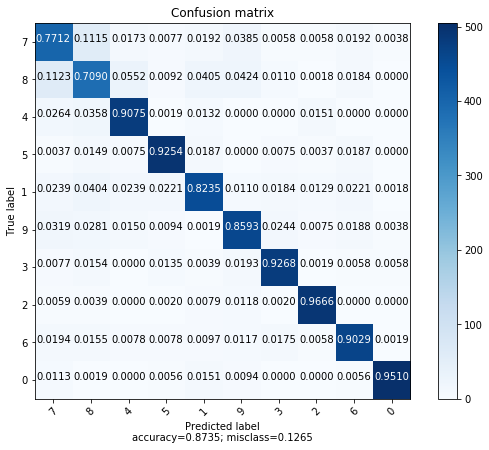

In [15]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(train_set_30.iloc[:,0:2303], train_set_30['target'])
y_pred = clf.predict(test_set_30.iloc[:, 0:2303])
conf_mat = confusion_matrix(test_set_30["target"], y_pred)
print(classification_report(test_set_30["target"], y_pred))
plot_confusion_matrix(conf_mat, target_names=test_set_30['target'].unique())


              precision    recall  f1-score   support

           0       0.65      0.66      0.66       793
           1       0.59      0.66      0.62       795
           2       0.92      0.83      0.87       807
           3       0.85      0.80      0.83       808
           4       0.69      0.72      0.70       806
           5       0.79      0.78      0.79       787
           6       0.89      0.87      0.88       761
           7       0.84      0.90      0.87       796
           8       0.84      0.82      0.83       782
           9       0.93      0.93      0.93       785

    accuracy                           0.80      7920
   macro avg       0.80      0.80      0.80      7920
weighted avg       0.80      0.80      0.80      7920



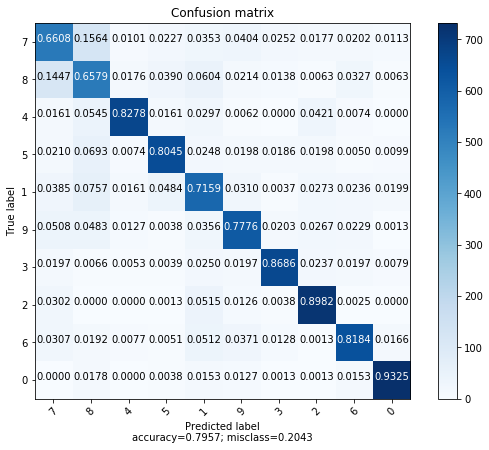

In [16]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(train_set_70.iloc[:,0:2303], train_set_70['target'])
y_pred = clf.predict(test_set_70.iloc[:, 0:2303])
conf_mat = confusion_matrix(test_set_70["target"], y_pred)
print(classification_report(test_set_70["target"], y_pred))
plot_confusion_matrix(conf_mat, target_names=test_set_70['target'].unique())